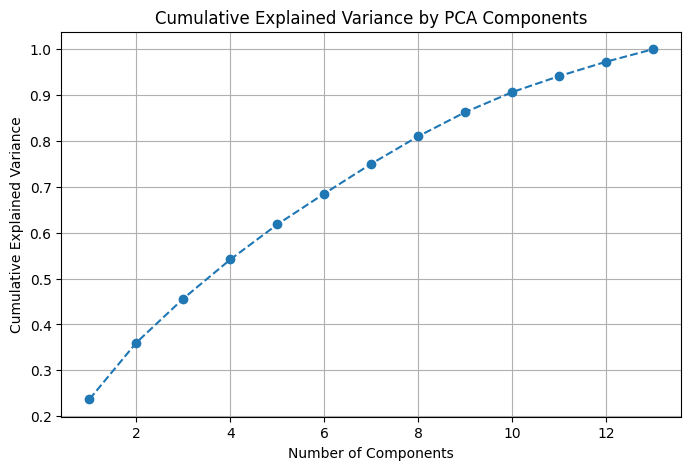

In [3]:
# 02_pca_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load preprocessed data
df = pd.read_csv('../data/heart_disease_cleaned.csv')

X = df.drop('target', axis=1)
y = df['target']

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Save transformed data (2 components for visualization)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)
df_pca = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca.to_csv('../data/heart_disease_pca.csv', index=False)
